In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors

# 1 Digital Signal and Sampling Theorem

In this exercise, you will generate and play with simple signals

## 1.1 Create a Signal

First, use the python library `NumPy` to generate a simple periodic signal. Plot 4 periods of a cosine oscillating at `10Hz` and sampled at `100Hz`. You can use the python library `matplotlib` imported above.

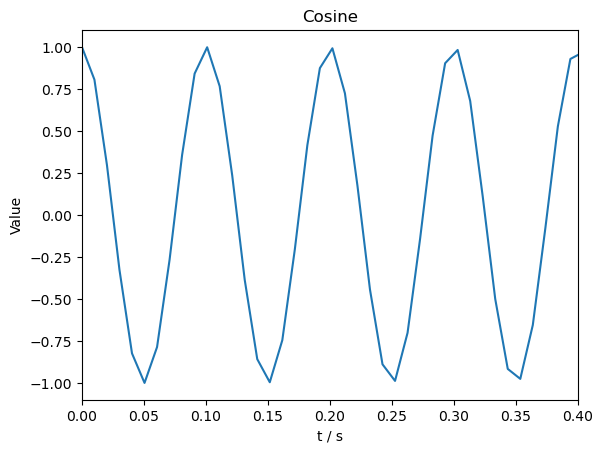

In [2]:
# your answer
fs = 100
f1 = 10
N = 4
t = np.linspace(0,1,fs)
y = np.cos(2*np.pi*f1*t)
plt.plot(t,y)
plt.xlim(0,1/(f1)*N)
plt.xlabel('t / s')
plt.ylabel('Value')
plt.title('Cosine')
plt.show()

Could you explain the following terms in a few words? Illustrate your explanations with the signal you created (remember to mention units when referring to physical variables):

- The amplitude of a signal
- The period of a signal
- Sampling frequency
- The frequency of a continuous signal
- The frequency of a discrete signal

### Answers:
- Amplitude: 1 (unit)
- Period: 0.1 s
- Sampling frequency: 100 Hz
- The frequency of a continuous signal: 10 Hz
- The frequency of a discrete signal: 10 Hz

## 1.2 Frequency Domain

The signal above oscillates at a frequency of `10Hz`. In the time domain, this is illustrated by a "wave" that loops between the same values over time. The time domain is very inefficient for processing oscillating signals. Fortunately, the frequency domain is more relevant for this type of signals. These domains are linked by the Fourier transform. To prove this statement, let's plot the Fourier transform of our signal.

Again, use `NumPy` to calculate the Fourier transform of your signal defined above. Traditionally, the Fourier transform is represented from negative to positive frequencies. `NumPy` produces a Fourier transform for positive frequencies. You can switch to the usual representation with the function `np.fft.fftshift()`.

Once you have calculated the Fourier transform, plot its absolute value, its real part, and its imaginary part.

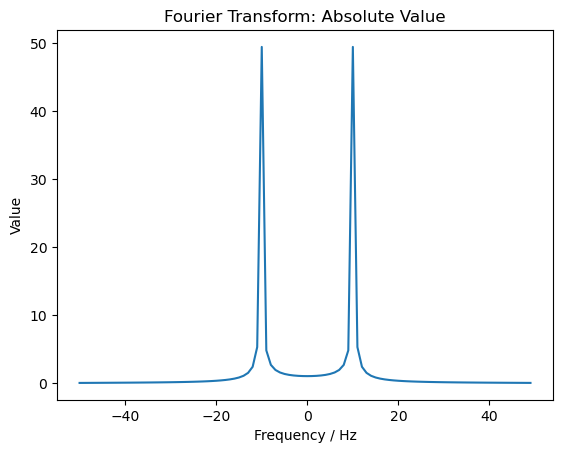

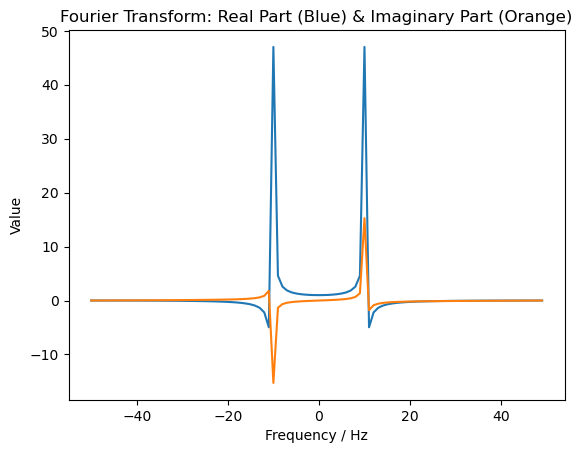

In [3]:
# your answer
Y = np.fft.fft(y)
freq = np.fft.fftfreq(len(t),1/fs)
freq_s = np.fft.fftshift(freq)
Y_s = np.fft.fftshift(Y)
#YY = np.absolute(Y)
plt.plot(freq_s, np.absolute(Y_s))
plt.xlabel('Frequency / Hz')
plt.ylabel('Value')
plt.title('Fourier Transform: Absolute Value')
plt.show()

plt.plot(freq_s, Y_s.real,freq_s, Y_s.imag)
plt.xlabel('Frequency / Hz')
plt.ylabel('Value')
plt.title('Fourier Transform: Real Part (Blue) & Imaginary Part (Orange)')
plt.show()

From the figures above:

- What are the properties of this Fourier transform (periodicity, parity, complex number, etc.)?
- What is the relationship between sample rate and digital frequency?
- Explain why the frequency domain is more relevant for periodic signals than the time domain.

### Answers:
- Properties: 
  * Periodicity: No period
  * Parity: Even (for absolute value & real part), Odd (for imaginary part).
  * Complex: the output of `np.fft.fft()` is a matrix with complex number elements.
- the relationship between sample rate and digital frequency: $\omega = \frac{2\pi f}{F_s}$, in which $f$ is the freqency of the signal and $F_s$ is sample rate.
- Explain: because these periodic signals consists signals with discrete freqencies, if we take apart them in freqency domain, it is much more relevant.

# 2 Sampling Theorem

Now that you are able to create a signal and calculate its Fourier transform, we'll look at the importance of sample rate.

## 2.1 Signals with multiple frequencies

Again, let's generate a periodic signal. The signal is a sum of two cosines sampled at `200 Hz`, one oscillating at `10 Hz` and the other at `40 Hz`. Plot `4` periods of the signal and the absolute value of its Fourier transform.

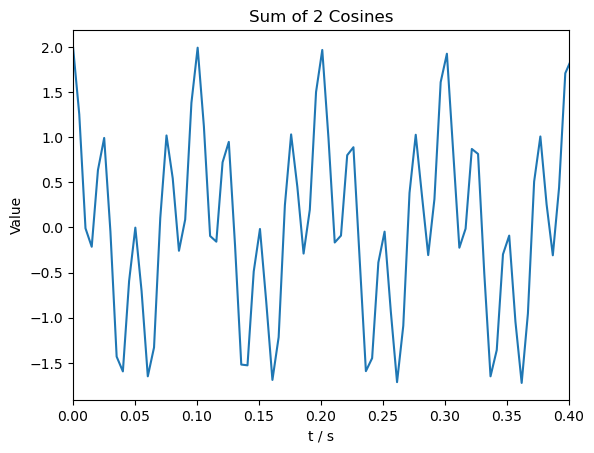

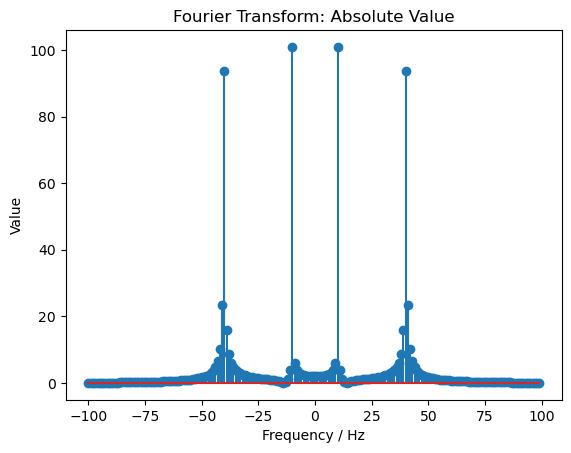

In [34]:
# your answer
fs = 200
f2 = 10
f3 = 40
t = np.linspace(0,1,fs)
y = np.cos(2*np.pi*f2*t) + np.cos(2*np.pi*f3*t)
plt.plot(t,y)
plt.xlim(0,1/(f2)*N)
plt.xlabel('t / s')
plt.ylabel('Value')
plt.title('Sum of 2 Cosines')
plt.show()

Y = np.fft.fft(y)
Y_s = np.fft.fftshift(Y)
freq = np.fft.fftfreq(t.size,1/fs)
freq_s = np.fft.fftshift(freq)
plt.stem(freq_s,np.absolute(Y_s))
plt.xlabel('Frequency / Hz')
plt.ylabel('Value')
plt.title('Fourier Transform: Absolute Value')
plt.show()

From the figures above:

- What are the differences in the time domain compared to the previous signal?
- What are the differences in the frequency domain compared to the previous signal?

### Answers:
- What are the differences in the time domain compared to the previous signal?   
  * it becomes a little bit more disorganiyed. 
- What are the differences in the time domain compared to the previous signal?   
  * we can easily discover that the signal is a sum of two signals with 10 Hz and 40 Hz. 

## 2.2 Effect of Sampling frequency and Nyquist Theorem

Let's play a little with the sample rate. Reuse the signal above, but change the sample rate to `100𝐻z`, `60𝐻z`, and `10𝐻z`. Plot the signal as well as the absolute value of the Fourier transform for each of these frequencies.

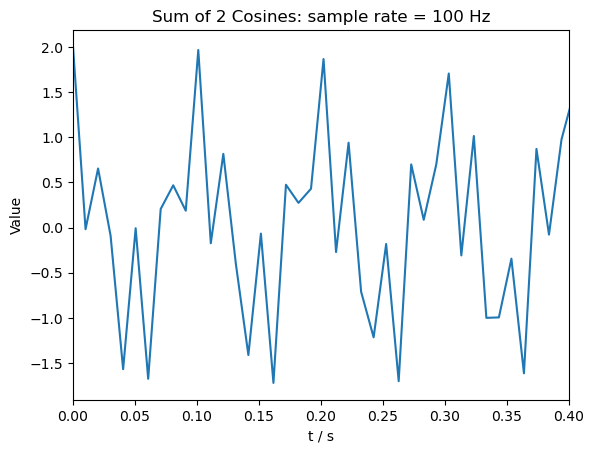

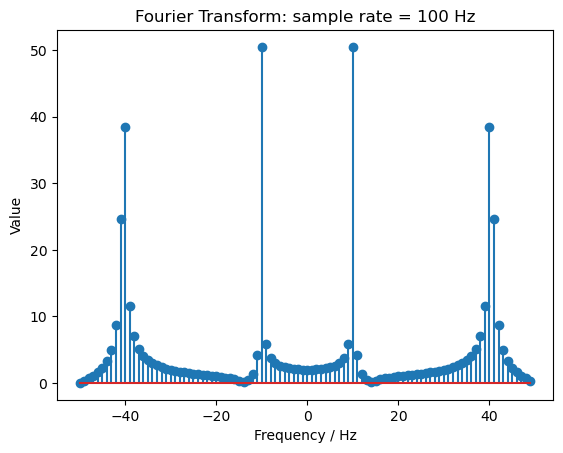

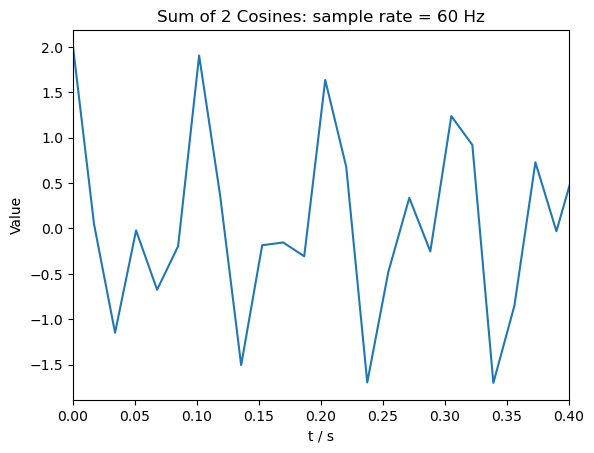

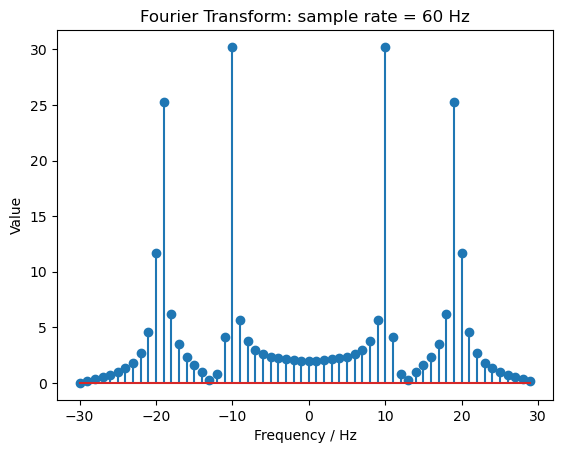

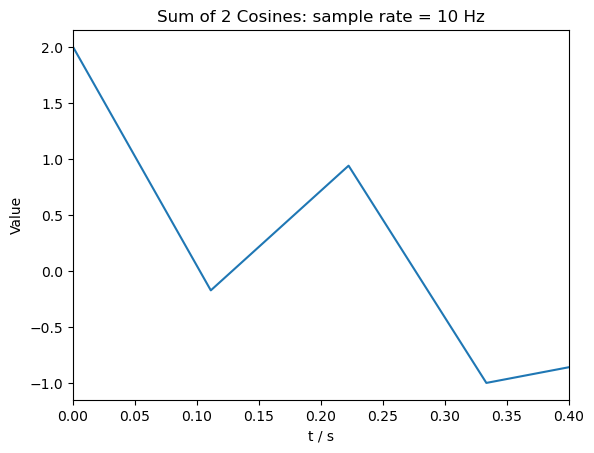

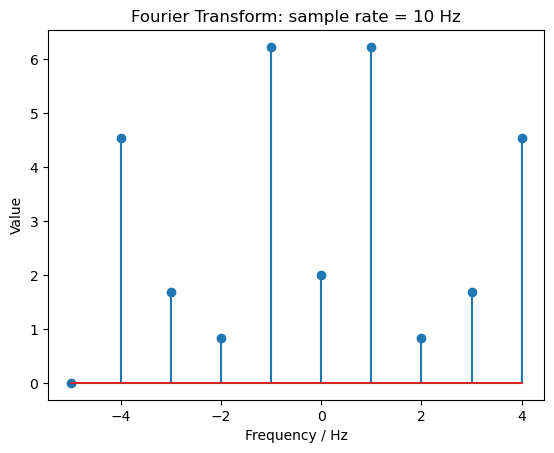

In [50]:
# your answer
Fs = [100, 60, 10]
f2 = 10
f3 = 40
N = 4

for fs in Fs:
    t = np.linspace(0,1,fs)
    y = np.cos(2*np.pi*f2*t) + np.cos(2*np.pi*f3*t)
    plt.plot(t,y)
    plt.xlim(0,1/(f2)*N)
    plt.xlabel('t / s')
    plt.ylabel('Value')
    plt.title('Sum of 2 Cosines: sample rate = %i Hz'%fs)
    plt.show()
    
    Y = np.fft.fft(y)
    Y_s = np.fft.fftshift(Y)
    freq = np.fft.fftfreq(t.size,1/fs)
    freq_s = np.fft.fftshift(freq)
    plt.stem(freq_s,np.absolute(Y_s))
    plt.xlabel('Frequency / Hz')
    plt.ylabel('Value')
    plt.title('Fourier Transform: sample rate = %i Hz'%fs)
    plt.show()

From the figures above:

- What is the effect of sampling frequency on the shape of the signal in the time domain?
- What is the effect of sampling frequency on the shape of the signal in the frequency domain?
- Can you intuitively explain why the sample rate has this effect in both the time domain and the frequency domain? Describe it for each sample rate above.
- If our goal is to recover the full signal from as few measurements as possible to optimize memory usage, what would be the optimal sampling rate?

### Answers:
- In the time domain, with the decrease of sampling frequency, the details of the signal are gradually lost. Lower sampling frequencies introduce aliasing and lead to signal distortion in the time domain.
- In the frequency domain, the frequency peaks are shown clearly. However, with the sampling frequency drops below 80 Hz and 20 Hz (below 2 times of the frequency of the 2 original cosines), the positions of these peaks begin to move.
- Higher sampling rates capture more details accurately, while lower sampling rates may lead to information loss and distortions. When the sampling frequency is less than twice the highest frequency component in the signal, aliasing occurs.
- It would be $2\times 40\ \text{Hz} = 80\ \text{Hz}$ .
  

## 2.3 Other signals

So far we have focused on purely oscillating signals. Let's try another type of signal, much closer to reality. Reuse the simple cosine from section 1.1, but add random Gaussian noise to it with the Numpy function `np.random.randn`. Gaussian noise must have zero mean and a standard deviation of 0.2. Plot the signal along with the absolute value of the Fourier transform.

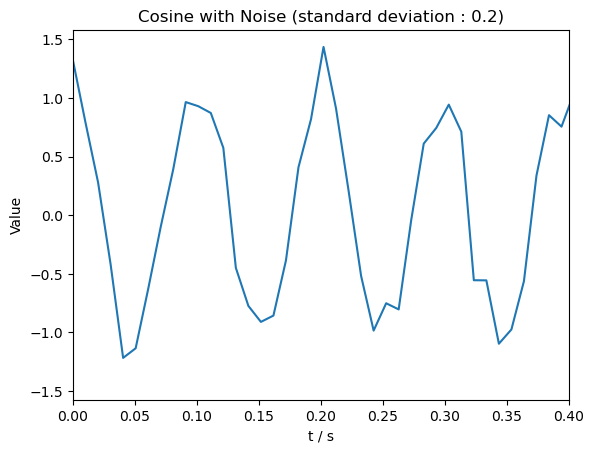

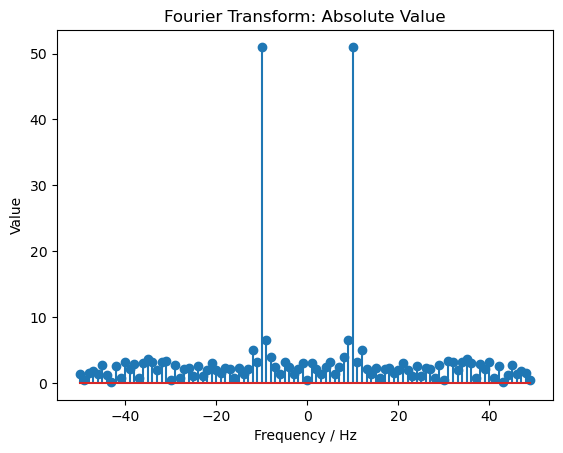

In [6]:
# your answer
fs = 100
f1 = 10
N = 4
t = np.linspace(0,1,fs)
y = np.cos(2*np.pi*f1*t) + 0.2 * np.random.randn(len(t))

plt.plot(t,y)
plt.xlim(0,1/(f1)*N)
plt.xlabel('t / s')
plt.ylabel('Value')
plt.title('Cosine with Noise (standard deviation : 0.2)')
plt.show()

Y = np.fft.fft(y)
Y_s = np.fft.fftshift(Y)

freq = np.fft.fftfreq(len(t),1/fs)
freq_s = np.fft.fftshift(freq)

plt.stem(freq_s,np.absolute(Y_s))
plt.xlabel('Frequency / Hz')
plt.ylabel('Value')
plt.title('Fourier Transform: Absolute Value')
plt.show()

From the figures above:

- What is the effect of noise in the time domain?
- What is the effect of noise in the frequency domain?

### Answers:
- In the time domain, the effect of noise is obvious, we can see signal distortion clearly.
- In the frequency domain, the effect of noise is not that clear, we can still easily distinguish the frequency of that signal from the noise.

Increase the standard deviation of the noise to 0.5, 1, and 2. Again, plot the signal with the absolute value of the Fourier transform.

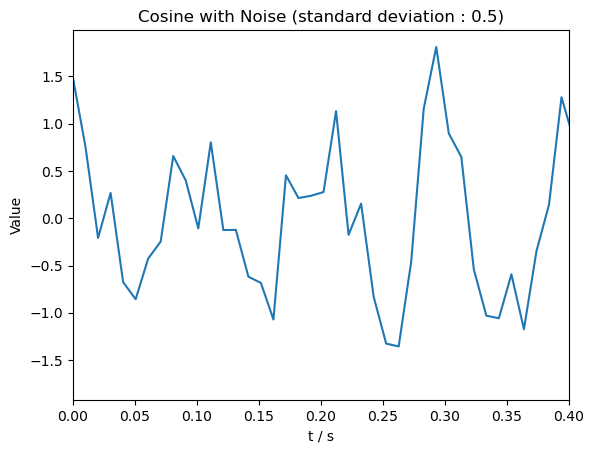

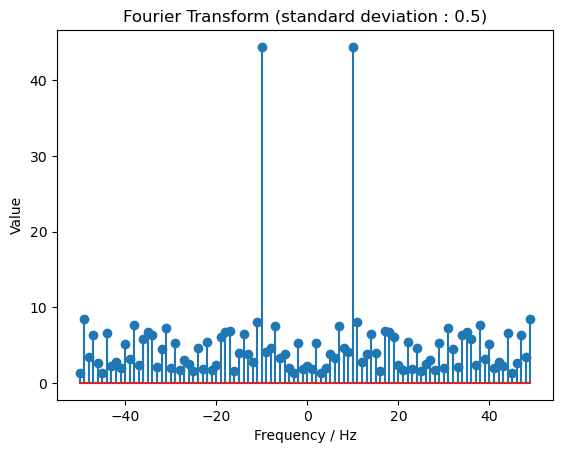

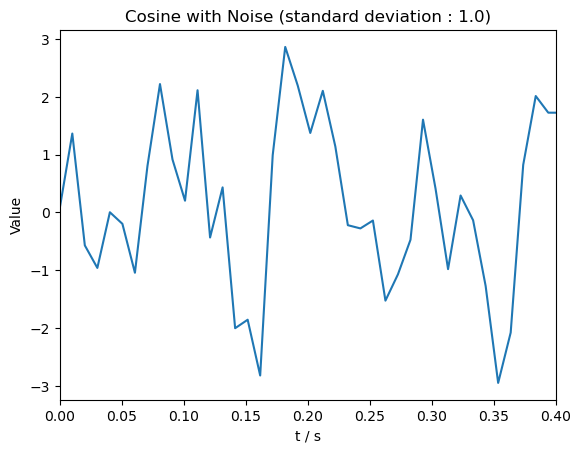

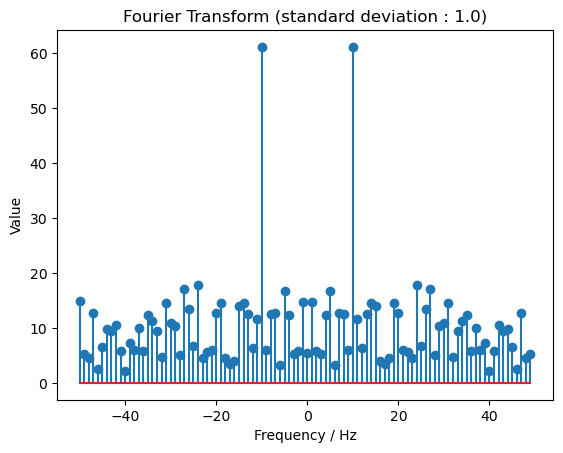

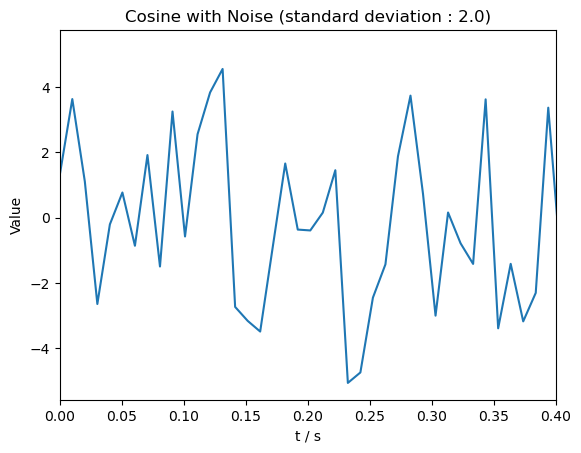

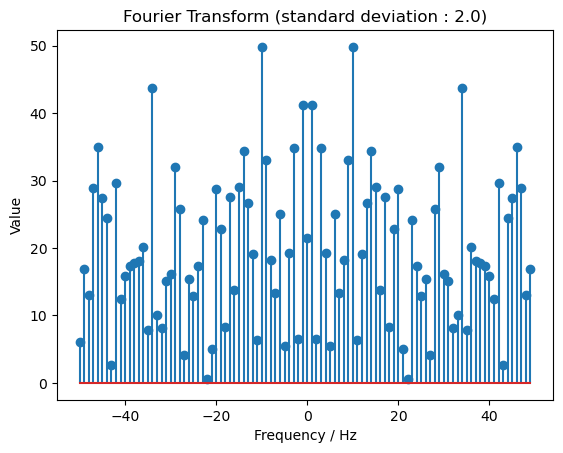

In [7]:
# your answer
fs = 100
f1 = 10
N = 4
t = np.linspace(0,1,fs)
A_noise = [0.5, 1, 2]
for A in A_noise:
    y = np.cos(2*np.pi*f1*t) + A * np.random.randn(len(t))

    plt.plot(t,y)
    plt.xlim(0,1/(f1)*N)
    plt.xlabel('t / s')
    plt.ylabel('Value')
    plt.title('Cosine with Noise (standard deviation : %.1f)'%A)
    plt.show()

    Y = np.fft.fft(y)
    Y_s = np.fft.fftshift(Y)
    freq = np.fft.fftfreq(len(t),1/fs)
    freq_s = np.fft.fftshift(freq)
    plt.stem(freq_s,np.absolute(Y_s))
    plt.xlabel('Frequency / Hz')
    plt.ylabel('Value')
    plt.title('Fourier Transform (standard deviation : %.1f)'%A)
    plt.show()

From the figures above:

- For each domain, could you decide whether the signal is periodic or not? Discuss the robustness of the representation to noise.
- Which signal is likely to be similar to a real signal? Why ?
- Could you explain why a high sample rate is not always the best solution?

### Answers:
- In the time domain, it is hard to discover the signal is periodic when the standard deviation becomes larger than 0.5 . But in the frequency domain, I can discover the frequency peak until the standard deviation exceeds 2.0 . The frequency domain is much more robust to noise.
- I think it may be the one which with a 1.0 standard deviation noise. I guess.
- A high sample rate means that the requirements for hardwares(such as memory and processors) are higher, which means it can be more expensive and unacceptable in some scenarios.

# 3 Signal Approximation

The basis $S \in R^{M\times N}$ and the discrete time vector $n \in R^N$ are generated using the function `build_basis()` defined below. Every signal $s_i(n)$ is represented by the $i^{th}$ row of $S$ and all $s_i(n)$ $i \in \{1,2,...,𝑀\}$ are linearly independent.

In [8]:
def build_basis(degree, n):
    """
    Build basis
    :param degree: Degree of the polynome
    :param n:      Number of point to sample
    """
    nt = np.arange(-1.0, 1.0, 2 / n)
    basis = np.zeros(shape=(degree, n))
    for k in range(degree):
        basis[k, :] = nt ** k
    return basis, nt

# Basis + Time
S, n = build_basis(degree=35, n=2000)

## 3.1 Visualization

Trace the signal $s_i(n)$ for $i \in 1,2,...8$ in a single graph and comment on the result. To do this, complete the function implementation `def plot_basis(basis, n)` below.

In [9]:
def plot_basis(basis, n):
    """
    Plot a given set of basis using Matplotlib
    :param basis: Numpy array holding a base vector on every row.
    :param n:     Time axis
    """
    # Votre réponse
    i = 0
    while i < len(basis):
        plt.plot(basis[i])
        i=i+1

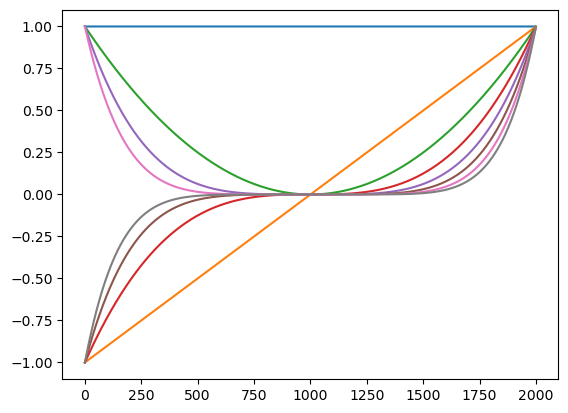

In [10]:
# Show basis
plot_basis(S[:8, :], n)

**Comment on what you observe**

### Answer:
The generated basis functions are polynomial functions.  
The degree of the basis functions is set to 35.  
The first 8 basis are plotted.

## 3.2 Orthogonality

Check if the basics in S are orthogonal. Implement the function `orthocheck(...)`, which takes a matrix $U \in R^{M\times N}$ as input storing the base on each row and give output `True` if $u_i(n)$, $i \in 1,2,...𝑀$ form an orthogonal base, otherwise `False`.

Tip: When you implement the function, values less than 1e-4 can be considered zeros.

In [11]:
def orthocheck(basis, tol=1e-4):
    """
    Check if a given basis is orthogonal.
    :param basis: Numpy array storing base vector on every row.
    :return: `True` if the basis is orthogonal, `False` otherwise.
    """
    
    # Your answer
    temp = 0
    for j in range(0,len(basis)):
        for i in range(0,j):
            inner = np.dot(basis[i],basis[j])
            if  inner > tol:
                return False
            else:
                temp += inner
    if inner > tol:
        return False
    else:
        return True
    

In [12]:
# Is basis orthogonal
if orthocheck(S):
    print('The basis functions forms an orthogonal basis!')
else:
    print('The basis functions does not form an orthogonal basis!!')

The basis functions does not form an orthogonal basis!!


## 3.3 Gram-Schmidt

Implement the function `modified_gramschmidt(...)`, which takes the matrix $U$ as input and applies the Gram-Schmidt algorithm to the signals `u_i(n)`, $i \in 1,2,...,𝑀$ and outputs the new base in the matrix $B$
.

It turns out that the Gram-Schmidt procedure that we introduced in the course suffers from numerical instability: Rounding errors can accumulate and destroy the orthogonality of the resulting vectors. Therefore, a modified Gram-Schmidt algorithm is introduced below to help remedy this problem.


#### Modified Gram-Schmidt
1. Set $v_j = u_j$ for all $j \in 1, 2, ..., M$
2. For $j=1, 2, ..., M$, compute:   
$v_j= \frac{v_j}{\|v_j\|_2}$   
$v_i = v_i - \langle v_i, v_j \rangle v_j \quad \forall i \in j+1, ..., M$   
3. Set $B=[v_1 v_2 ... v_M]^T$

Check that the new base $v_i(n)$, $i \in 1,2,..., M$ are well orthonormal. Trace the signals $v_i(n)$ for $i \in 1,2,..., 8$ in the same graph and comment on the resulting signals generated by the Gram-Schmidt algorithm.

In [13]:
def modified_gramschmidt(basis):
    """
    Apply Gram-Schmidt to orthogonalize a given basis.
    :param basis: Numpy array storing base vector on every row.
    :return: Numpy array with orthogonalized basis.
    """
    # your answer
    temp_basis = basis
    for j in range(0,len(temp_basis)):
        temp_basis[j] = temp_basis[j]/np.linalg.norm(temp_basis[j])
        for i in range(j+1,len(temp_basis)):
            temp_basis[i] = temp_basis[i] - np.dot(temp_basis[i],temp_basis[j])*temp_basis[j]
    return temp_basis

The basis functions forms an orthogonal basis!


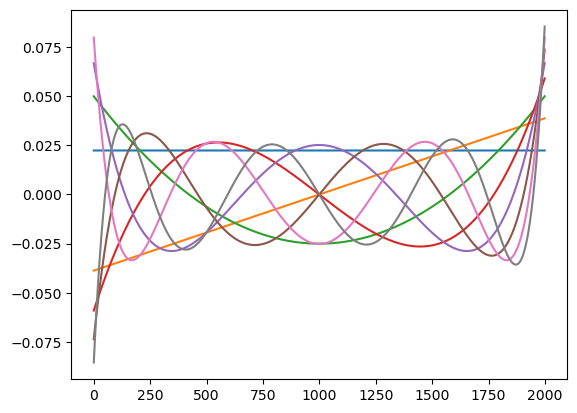

In [14]:
# Apply Gram-Schmidt 
B = modified_gramschmidt(S)
if orthocheck(B):
    print('The basis functions forms an orthogonal basis!')
else:
    print('The basis functions does not form an orthogonal basis!!')
plot_basis(B[:8, :], n)

**Comment on what you observe**

### Answer: 
With the function `modified_gramschmidt()` , we get an orthogonal basis based on the generated basis above.  
Many functions in the figure are axially symmetrical or centrally symmetrical.

## 3.4 Approximation

Consider the signal $f(t)$ defined for $-1\leq t<1$ as:   
$$f(t)=(−2|t|+1)^3+ \frac{1}{2}(−2|t|+1)^2$$
 
Define $f(n)$ by sampling the signal $f(t)$ using the vector $n$ computed above ($N=2000$). Write a script to project $f(n)$ on the orthogonal basis $v_i(n)$, $i \in 1,2,...,K$ with $K \in 5,10,15,20,25,30,35$. Plot the signal $f(n)$ and its approximations $\hat{f}_K(n)$ for $K \in 5,10,15,20,25,30,35$ and comment on what you get.

The reconstruction error between $f(n)$ and $\hat{f}_K(n)$ is measured using the mean square error ( MSE ) and is defined as:   

$$MSE(K)=\frac{1}{N}\|f(n)−\hat{f}_K(n)\|^2$$
 
Plot the change in the mean squared error versus $K$ and comment on what you observe.

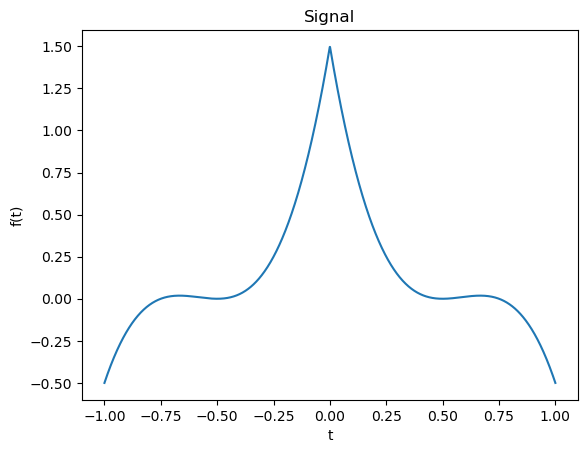

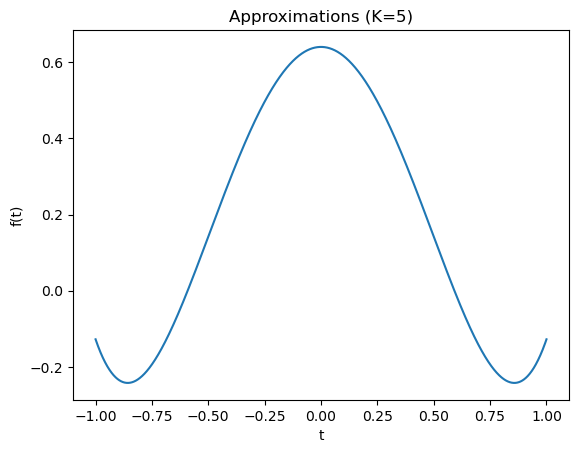

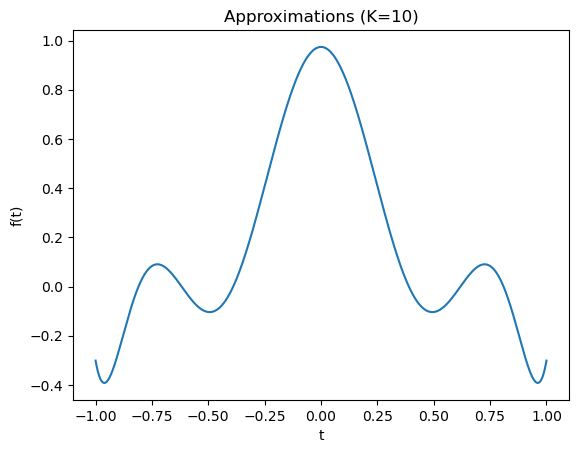

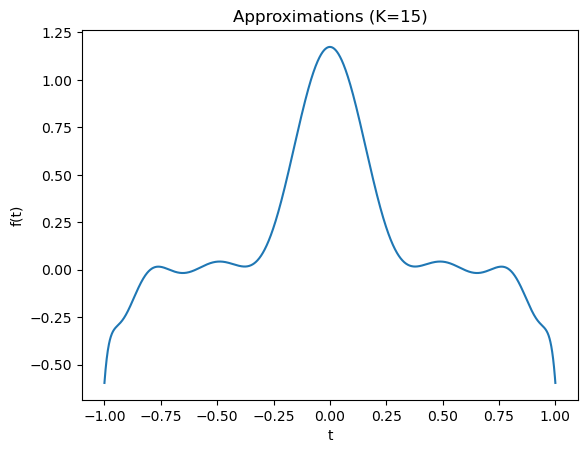

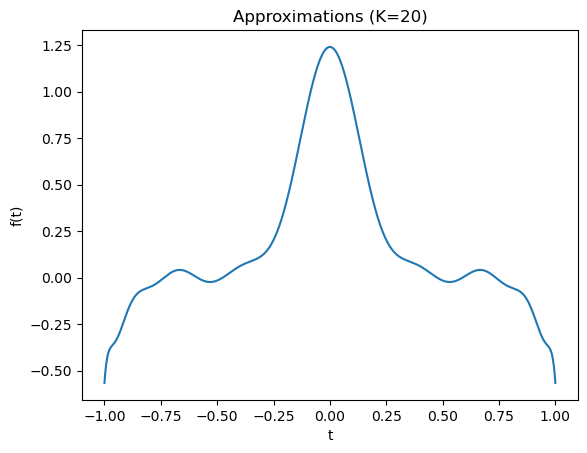

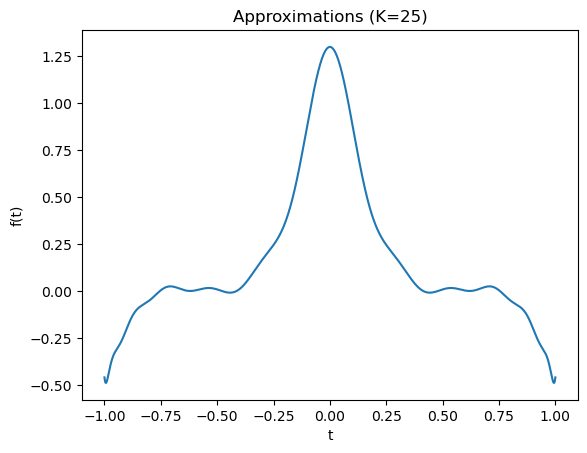

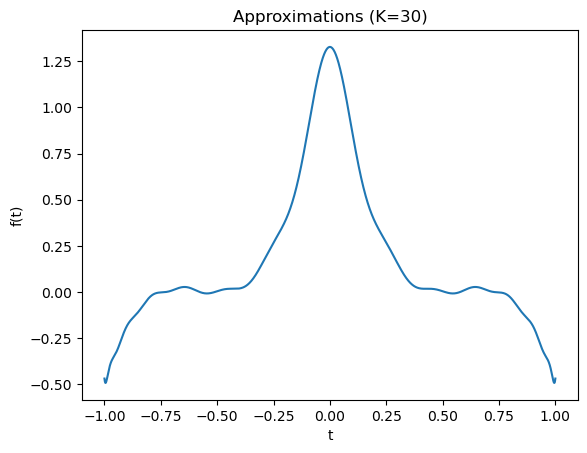

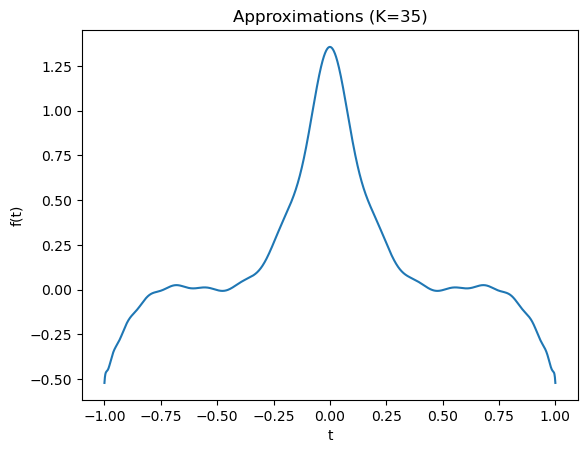

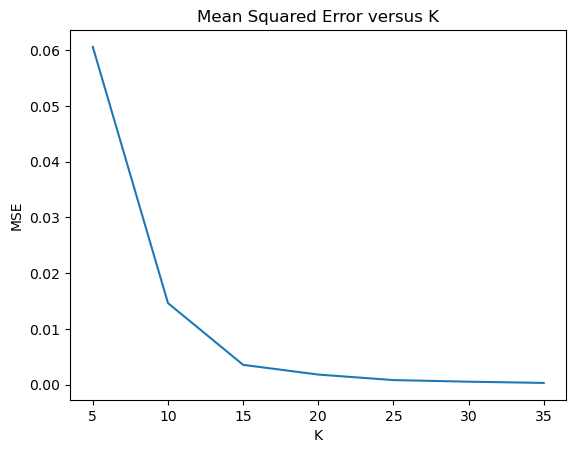

In [15]:
# Your answer
def f(t):
    return ((-2 * np.abs(t) + 1) ** 3) + (0.5 * (-2 * np.abs(t) + 1) ** 2)
N = 2000
t = np.linspace(-1,1,N)
ft = f(t)
plt.plot(t,ft)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Signal')
plt.show()

K = [5, 10, 15, 20, 25, 30, 35]
mse = []
for k in K:
    f_basis = B[:k]
    f_hat_K = np.zeros_like(ft)
    for i in range(0,k):
        f_hat_K += np.dot(ft,f_basis[i])/(np.linalg.norm(f_basis[i])**2)*f_basis[i]
    mse.append(np.linalg.norm(ft-f_hat_K)**2/N)
    plt.plot(t,f_hat_K)
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.title('Approximations (K=%d)'%k)
    plt.show()
plt.plot(K,mse)
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('Mean Squared Error versus K')
plt.show()

**Comment on what you observe**

### Answer:
With $K$ increases, these approximations are getting closer and colser to the signal.  
As $K$ increases linearly, $MSE$ decreases exponentially.